In [ ]:
# Context: Insurance providers face challenges in analyzing healthcare claims data due to complex ICD-10 codes and inconsistent data structures.
# which hinder reliable insights.

In [ ]:
# Problem Statement:Insurance providers struggle with healthcare claims data due to:
# - Interpretability of ICD-10 Codes
# - Inconsistent Data - Variability in data formatting and quality
# - Analysis Impact - Erroneous predictive modeling, and 

In [4]:
# Import necessary libraries for operations, ml prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# Get understanding of data; columns info; descriptive stats
hcdata = pd.read_csv("/Users/rishimallela/Downloads/enhanced_health_insurance_claims.csv")
hcdata.head()
hcdata.info()
hcdata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClaimID                  4500 non-null   object 
 1   PatientID                4500 non-null   object 
 2   ProviderID               4500 non-null   object 
 3   ClaimAmount              4500 non-null   float64
 4   ClaimDate                4500 non-null   object 
 5   DiagnosisCode            4500 non-null   object 
 6   ProcedureCode            4500 non-null   object 
 7   PatientAge               4500 non-null   int64  
 8   PatientGender            4500 non-null   object 
 9   ProviderSpecialty        4500 non-null   object 
 10  ClaimStatus              4500 non-null   object 
 11  PatientIncome            4500 non-null   float64
 12  PatientMaritalStatus     4500 non-null   object 
 13  PatientEmploymentStatus  4500 non-null   object 
 14  ProviderLocation        

,ClaimAmount,PatientAge,PatientIncome
count,4500.000000,4500.000000,4500.000000
mean,5014.203867,49.838444,84384.284084
std,2866.291066,28.790471,37085.908878
min,100.120000,0.000000,20006.870000
25%,2509.072500,25.000000,52791.905000
50%,5053.765000,50.500000,84061.205000
75%,7462.452500,75.000000,115768.417500
max,9997.200000,99.000000,149957.520000


In [46]:
# encoding gender as male and female in every instance of PatientGender
hcdata['PatientGender'] = hcdata['PatientGender'].map({'M': 0, 'F': 1})

In [49]:
# convert categorical vars into indicator vars; each unique value in column is its own column.
hcdata = pd.get_dummies(hcdata, columns=['PatientMaritalStatus', 'PatientEmploymentStatus', 'ClaimType', 'ProviderSpecialty'])

In [51]:
# drop irrelevant column data for accurate analysis
hcdata_cleaned = hcdata.drop(columns=['ClaimID', 'PatientID', 'ProviderID', 'ClaimDate', 'ClaimSubmissionMethod', 'ProviderLocation', 'DiagnosisCode', 'ProcedureCode', 'ClaimStatus'])

In [53]:
# count frequency of each diagnosis code; make that a new column called 'DiagnosisFreq'
diag_freq = hcdata['DiagnosisCode'].value_counts().to_dict()
hcdata_cleaned['DiagnosisFreq'] = hcdata['DiagnosisCode'].map(diag_freq)

In [55]:
# 1. Define features/variables for prediction (excluding ClaimAmount)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Separate "Claim Amount" (predicted value) from variables that help us predict.
features = hcdata_cleaned.drop(columns=['ClaimAmount'])
target = hcdata['ClaimAmount']

# Split data into learn and test groups (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the model to predict cost.
model = RandomForestRegressor()
model.fit(X_train, y_train)

# ------- Predictions evaluation: Use insights to understand prediction accuracy -------
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Value:", r2_score(y_test, y_pred))

Mean Squared Error: 8581066.235389754
R-Squared Value: -0.06910113282893371


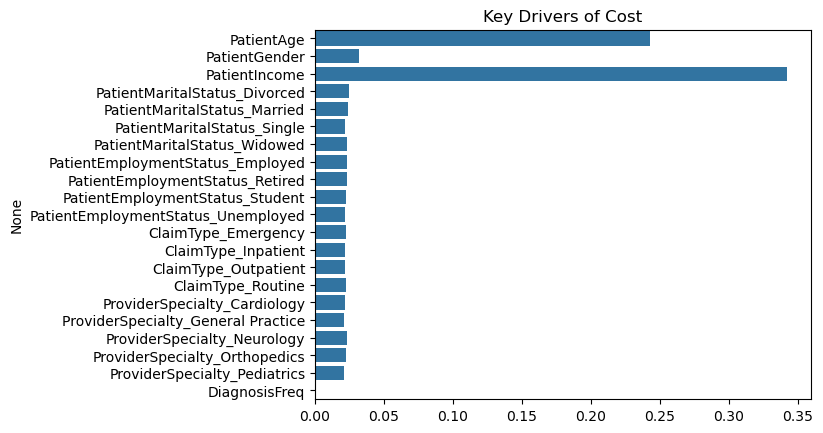

In [56]:
## Following low R^2 value and high Mean Sq. Error value, identify key cost drivers for further diagnosis of issue. 

# Make sure the model learned from data properly
model.fit(X_train, y_train)

# Understand which factors matter most for cost prediction
importances = model.feature_importances_
feat_names = features.columns

# Visualize important drivers of healthcare cost in data
sns.barplot(x=importances, y=feat_names)
plt.title('Key Drivers of Cost')
plt.show()

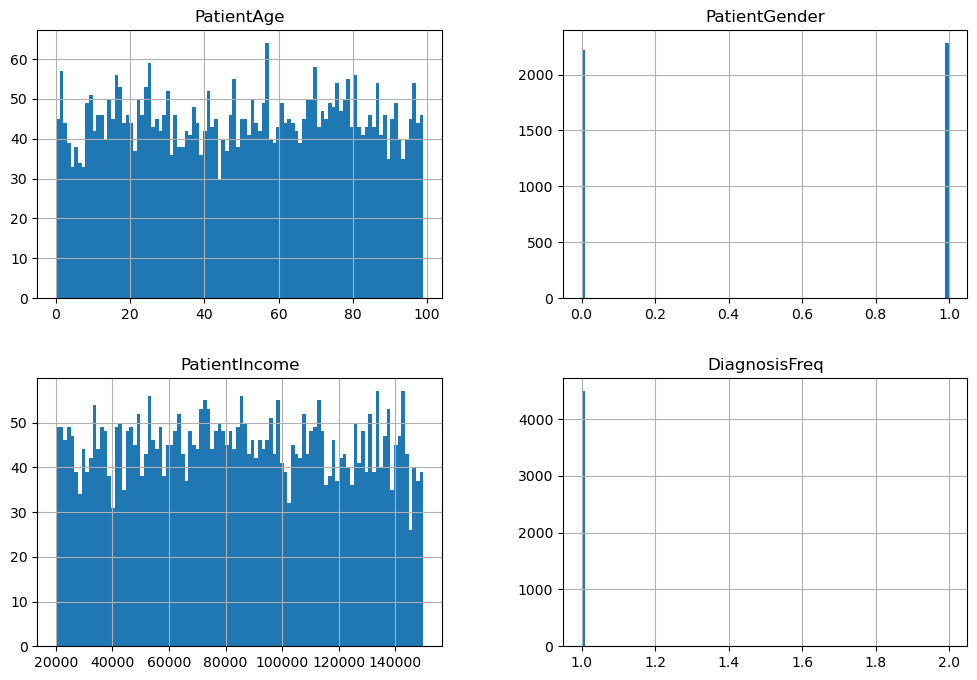

In [58]:
# check data quality using visual distribution of each variable
features.hist(figsize=(12,8), bins=100)
plt.show()


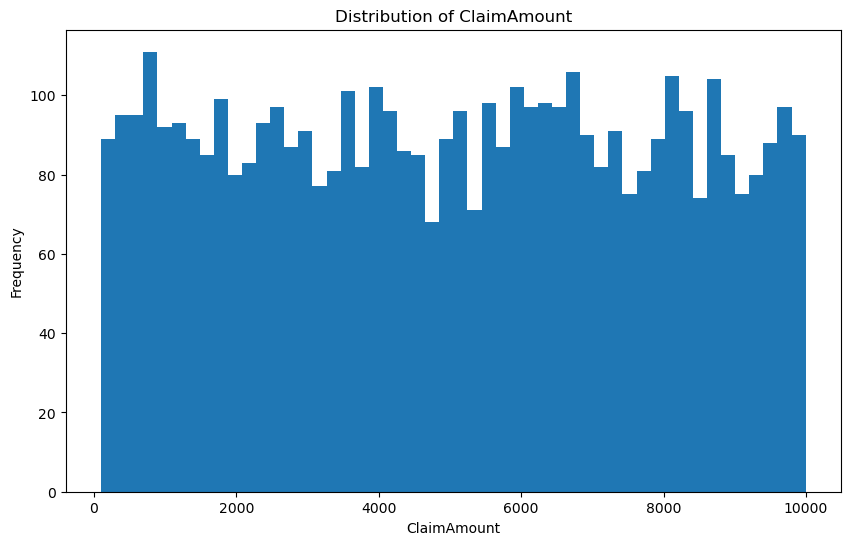

In [59]:
# see distribution of claim amounts to understand if data is inaccurate, synthetic, or mistakenly inputted.
plt.figure(figsize=(10, 6))
plt.hist(target, bins=50)
plt.title('Distribution of ClaimAmount')
plt.xlabel('ClaimAmount')
plt.ylabel('Frequency')
plt.show()
# Distribution Analysis: a Uniform pattern across all amounts indicates synthetic data
# NOT real-world healthcare claims (real data would show a right-skew pattern)

In [ ]:
# Legend to Interpet Distribution
# Right-skewed (many small claims, few large ones): Normal healthcare cost pattern
# Uniform distribution (equal frequencies across all amounts): Likely synthetic data
# Multiple Peaks : May indicate different claim categories merged together
# Isolated spikes at round numbers: Often indicates estimated rather than actual costs
# Too-perfect bell curve: Suggests artificially generated data rather than real claims
# Abrupt cutoffs: May indicate capped claim amounts or data filtering
# Extreme outliers without transition: Possible data entry errors (e.g., extra zeros)
# Gaps or missing ranges: Could indicate data collection issues or artificial manipulation
# Perfect symmetry: Rarely occurs in real healthcare costs, suggests synthetic data